In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [3]:
df_all = pd.concat([train,test],axis=0)

In [6]:
df_all.shape

(1309, 12)

In [7]:
df_all.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
df_all['Age'] = df_all['Age'].fillna(df_all['Age'].mean())
df_all['Embarked'] = df_all['Embarked'].fillna(df_all['Embarked'].mode()[0])
df_all['Fare'] = df_all['Fare'].fillna(df_all['Fare'].mean())


                                   

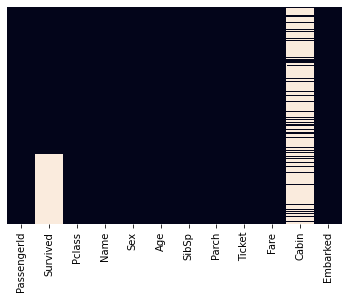

In [9]:
sns.heatmap(df_all.isnull(),yticklabels=False,cbar=False)

In [10]:
df_all.drop(['Cabin','Ticket'],axis=1,inplace=True)

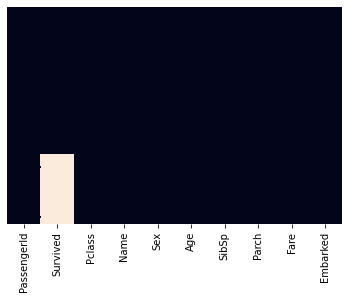

In [11]:
sns.heatmap(df_all.isnull(),yticklabels=False,cbar=False)


In [13]:
df_all.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [14]:
t1 = str(df_all.Name[1])
t2 = t1.split(',')[1].split('.')[0].strip()
t2

'Mrs'

In [16]:
#feature engineering
df_all['Title'] = df_all.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [17]:
df_all.drop(['PassengerId','Name'],axis=1,inplace=True)

In [18]:
df_all.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,Mr


In [22]:
df_all['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [23]:
df_all['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [24]:
df_all['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Mme               1
the Countess      1
Jonkheer          1
Sir               1
Capt              1
Dona              1
Lady              1
Don               1
Name: Title, dtype: int64

In [25]:
df_all['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [31]:
df_all['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [33]:
df_all['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [42]:
def oneHotEncoding(category,df,drop_first_or_not):
    temp_df = df
    if drop_first_or_not == 'X':
        temp_df = pd.get_dummies(df[category],drop_first=True)
    else:
        temp_df = pd.get_dummies(df[category],drop_first=False)
    df.drop([category],axis=1,inplace=True)
    final_df = pd.concat([df,temp_df],axis=1)
    return final_df

In [39]:
#one hot encoding for categories Pclass, Sex,Embarked,Title, Parch
df_all_pdummies = pd.get_dummies(df_all[['Pclass','Sex','Embarked','Title']])


In [40]:
df_all_pdummies.head()

,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Capt,Title_Col,Title_Don,Title_Dona,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,3,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
df_all_pdummies.columns

Index(['Pclass', 'Age', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dona',
       'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

In [44]:
df_all1 = oneHotEncoding('Sex',df_all,'X')
df_all1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,male
0,0.0,3,22.0,1,0,7.2500,S,Mr,1
1,1.0,1,38.0,1,0,71.2833,C,Mrs,0
2,1.0,3,26.0,0,0,7.9250,S,Miss,0
3,1.0,1,35.0,1,0,53.1000,S,Mrs,0
4,0.0,3,35.0,0,0,8.0500,S,Mr,1


In [47]:
df_all = df_all1.copy()
df_all.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,male
0,0.0,3,22.0,1,0,7.2500,S,Mr,1
1,1.0,1,38.0,1,0,71.2833,C,Mrs,0
2,1.0,3,26.0,0,0,7.9250,S,Miss,0
3,1.0,1,35.0,1,0,53.1000,S,Mrs,0
4,0.0,3,35.0,0,0,8.0500,S,Mr,1


In [48]:
df_all = oneHotEncoding('Embarked',df_all,' ')
df_all.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male,C,Q,S
0,0.0,3,22.0,1,0,7.2500,Mr,1,0,0,1
1,1.0,1,38.0,1,0,71.2833,Mrs,0,1,0,0
2,1.0,3,26.0,0,0,7.9250,Miss,0,0,0,1
3,1.0,1,35.0,1,0,53.1000,Mrs,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,Mr,1,0,0,1


In [49]:
df_all = oneHotEncoding('Pclass',df_all,'X')
df_all.head()

,Survived,Age,SibSp,Parch,Fare,Title,male,C,Q,S,2,3
0,0.0,22.0,1,0,7.2500,Mr,1,0,0,1,0,1
1,1.0,38.0,1,0,71.2833,Mrs,0,1,0,0,0,0
2,1.0,26.0,0,0,7.9250,Miss,0,0,0,1,0,1
3,1.0,35.0,1,0,53.1000,Mrs,0,0,0,1,0,0
4,0.0,35.0,0,0,8.0500,Mr,1,0,0,1,0,1


In [50]:
df_all = oneHotEncoding('Title',df_all,' ') # do not drop the first column for title
df_all.head()

,Survived,Age,SibSp,Parch,Fare,male,C,Q,S,2,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,0.0,22.0,1,0,7.2500,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1.0,38.0,1,0,71.2833,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,26.0,0,0,7.9250,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,35.0,0,0,8.0500,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
df_all.drop(['C'],axis=1,inplace=True)
df_all.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,0.0,22.0,1,0,7.2500,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1.0,38.0,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,26.0,0,0,7.9250,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1.0,35.0,1,0,53.1000,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,35.0,0,0,8.0500,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [52]:
df_all_scaled = df_all.copy()

In [54]:
#scale data using standard scaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_all_scaled [['Age','SibSp','Parch','Fare']]= scale.fit_transform(df_all_scaled[['Age','SibSp','Parch','Fare']])
df_all_scaled.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,0.0,-0.611972,0.481288,-0.445,-0.503595,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1.0,0.630431,0.481288,-0.445,0.734503,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,-0.301371,-0.479087,-0.445,-0.490544,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1.0,0.397481,0.481288,-0.445,0.382925,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.397481,-0.479087,-0.445,-0.488127,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [59]:
# create x_train , y_train and x_test

test_new = df_all_scaled[df_all_scaled.Survived.isnull()]
test_new.shape

(418, 28)

In [60]:
x_test = test_new.copy()
x_test.shape

(418, 28)

In [64]:
x_test.drop(['Survived'],axis=1,inplace=True)
x_test.shape

(418, 27)

In [61]:
train_new = df_all_scaled[df_all_scaled.Survived.notnull()]
train_new.shape

(891, 28)

In [67]:
y_train = train_new['Survived']
x_train = train_new.drop(['Survived'],axis=1)

In [85]:
x_train.shape

(891, 27)

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [73]:
#Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.62011173 0.63483146 0.79213483 0.76966292 0.62921348]
0.6891908856945577


In [74]:
#Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83798883 0.81460674 0.79775281 0.79213483 0.85955056]
0.8204067541271736


In [75]:
#decision tree classifier
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77653631 0.79213483 0.83707865 0.73033708 0.76966292]
0.7811499591990458


In [76]:
#K nearest neighbour
knn = KNeighborsClassifier()
cv = cross_val_score(knn,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79888268 0.78089888 0.84831461 0.83146067 0.83707865]
0.819327098110602


In [77]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79329609 0.80337079 0.85955056 0.75280899 0.81460674]
0.8047266336074321


In [78]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81005587 0.82022472 0.85393258 0.78089888 0.8258427 ]
0.8181909484652564


In [79]:
svc = SVC(probability = True)
cv = cross_val_score(svc,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8547486  0.82022472 0.8258427  0.80898876 0.87078652]
0.8361182599962339


In [80]:
svcClassifier = SVC(probability = True)
svcClassifier.fit(x_train,y_train)

SVC(probability=True)

In [81]:
import pickle
filename = 'finalised_model.pkl'
pickle.dump(svcClassifier,open(filename,'wb'))

In [82]:
y_pred=svcClassifier.predict(x_test)
y_pred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [83]:
len(y_pred)

418

In [84]:
pred = pd.DataFrame(y_pred)
sub_fr = pd.read_csv('gender_submission.csv')
datasets = pd.concat([sub_fr['PassengerId'],pred],axis=1)
datasets.columns = ['PassengerId','Survived']
datasets.to_csv('gender_submission.csv',index=False) 

In [87]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [ ]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(x_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
